In [14]:
import pandas as pd

# Load your data into a pandas DataFrame
file_path = '../data/AAPL_historical_data.csv'  
data = pd.read_csv(file_path)

# Ensure data includes necessary columns
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


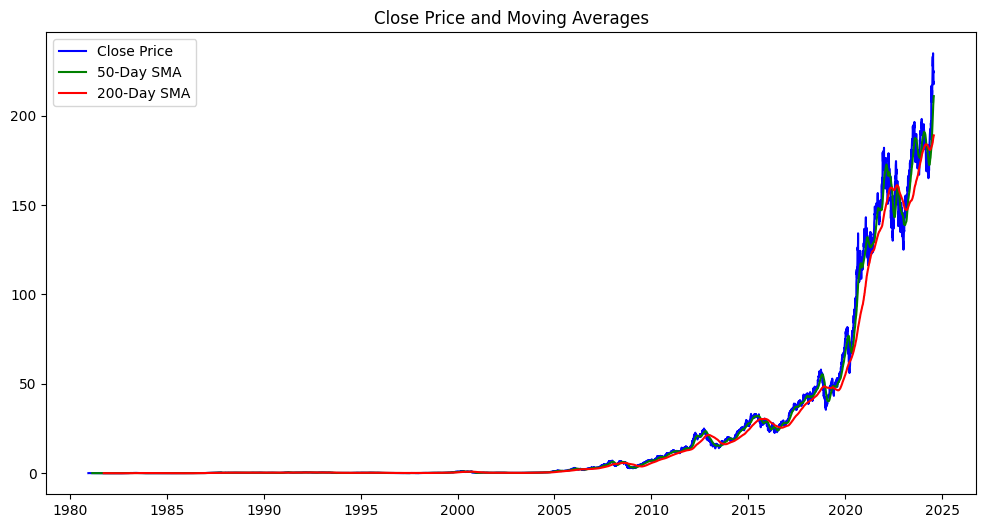

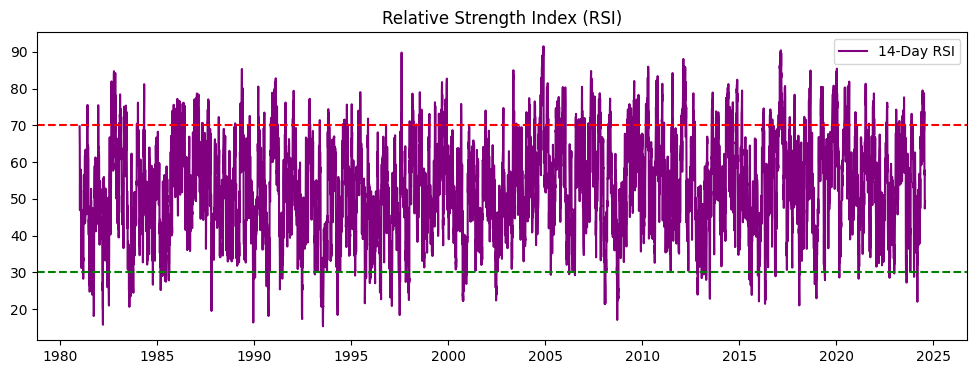

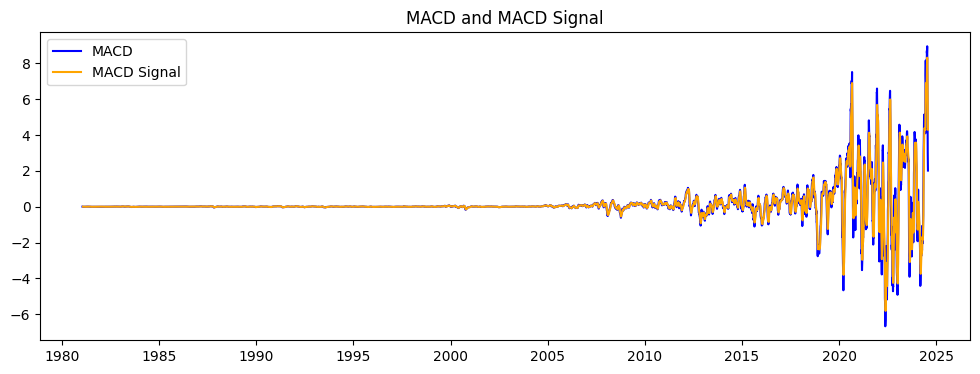

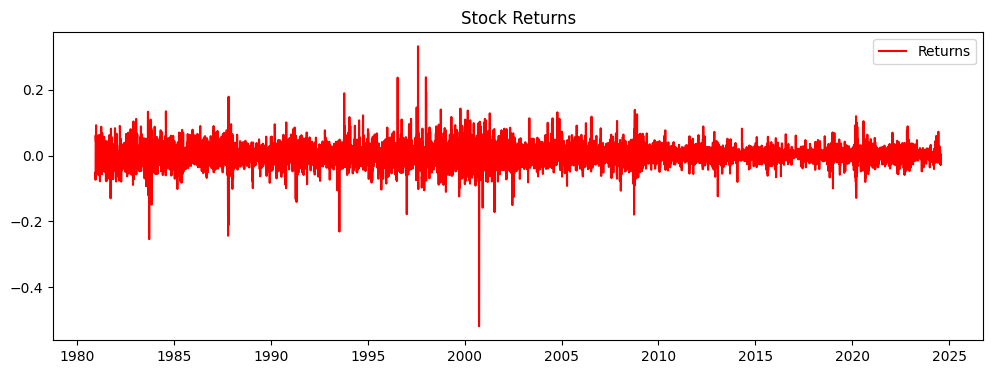

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import ta  # technical analysis library

# Load your stock price data
file_path = '../data/AAPL_historical_data.csv'
data = pd.read_csv(file_path)

# Ensure necessary columns are present: Open, High, Low, Close, Volume
print(data.head())

# 1. Prepare and Clean the Data
# Convert 'Date' column to datetime and sort by date if not already
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').reset_index(drop=True)

# Set 'Date' as the DataFrame index for easier plotting and analysis
data.set_index('Date', inplace=True)

# 2. Apply Technical Indicators with `ta`

# Moving Averages
data['SMA_50'] = ta.trend.sma_indicator(close=data['Close'], window=50)
data['SMA_200'] = ta.trend.sma_indicator(close=data['Close'], window=200)

# Relative Strength Index (RSI)
data['RSI_14'] = ta.momentum.rsi(close=data['Close'], window=14)

# MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

# 3. Financial Metrics using pandas
# Calculate stock returns
data['Returns'] = data['Close'].pct_change()

# 4. Visualize the Data

# Plot the Close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 4))
plt.plot(data['RSI_14'], label='14-Day RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--')  # Overbought level
plt.axhline(y=30, color='green', linestyle='--')  # Oversold level
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='MACD Signal', color='orange')
plt.title('MACD and MACD Signal')
plt.legend()
plt.show()

# Plot Returns
plt.figure(figsize=(12, 4))
plt.plot(data['Returns'], label='Returns', color='red')
plt.title('Stock Returns')
plt.legend()
plt.show()


In [9]:
data['Daily_Returns'] = data['Close'].pct_change()

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Daily_Returns']).cumprod()

print(data[['Close', 'Daily_Returns', 'Cumulative_Returns']].head())

               Close  Daily_Returns  Cumulative_Returns
Date                                                   
1980-12-12  0.128348            NaN                 NaN
1980-12-15  0.121652      -0.052171            0.947829
1980-12-16  0.112723      -0.073398            0.878261
1980-12-17  0.115513       0.024751            0.899998
1980-12-18  0.118862       0.028992            0.926092


In [10]:
import numpy as np

# Example: Calculate future value of an investment
# Formula: FV = PV * (1 + r)^n
PV = 1000  # Present Value (initial investment)
r = 0.05  # Annual interest rate
n = 10  # Number of years

FV = PV * (1 + r) ** n
print(f"Future Value after {n} years: {FV:.2f}")


Future Value after 10 years: 1628.89


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ta  # Technical Analysis Library
import pynance as pn  # Financial metrics with PyNance

# Load your stock price data
file_path = '../data/AMZN_historical_data.csv'
data = pd.read_csv(file_path)

# Ensure necessary columns are present: Open, High, Low, Close, Volume
print(data.head())

# 1. Prepare and Clean the Data
# Convert 'Date' column to datetime and sort by date if not already
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').reset_index(drop=True)

# Set 'Date' as the DataFrame index for easier plotting and analysis
data.set_index('Date', inplace=True)

# 2. Apply Technical Indicators with `ta`

# Moving Averages
data['SMA_50'] = ta.trend.sma_indicator(close=data['Close'], window=50)
data['SMA_200'] = ta.trend.sma_indicator(close=data['Close'], window=200)

# Relative Strength Index (RSI)
data['RSI_14'] = ta.momentum.rsi(close=data['Close'], window=14)

# MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

# 3. Financial Metrics using PyNance
# Calculate and add cumulative returns
# PyNance provides tools to analyze financial time series data
financial_metrics = pn.data(data[['Close']])

# Calculate returns and other metrics
data['Cumulative_Returns'] = financial_metrics.cumulative_returns()
data['Annual_Volatility'] = financial_metrics.rolling_volatility(window=252)  # 252 trading days in a year

# 4. Visualize the Data

# Set up plotting style
plt.style.use('seaborn-darkgrid')

# Plot the Close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot RSI with highlighted overbought and oversold regions
plt.figure(figsize=(12, 4))
plt.plot(data['RSI_14'], label='14-Day RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', lw=1, label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', lw=1, label='Oversold (30)')
plt.fill_between(data.index, y1=70, y2=100, color='red', alpha=0.1)
plt.fill_between(data.index, y1=0, y2=30, color='green', alpha=0.1)
plt.title('AAPL 14-Day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD with Signal Line and Histogram
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD'] - data['MACD_Signal'], color='gray', alpha=0.3, label='MACD Histogram')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot Returns
plt.figure(figsize=(12, 4))
plt.plot(data['Returns'], label='Daily Returns', color='red')
plt.title('AAPL Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(12, 4))
plt.plot(data['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.title('AAPL Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Annual Volatility
plt.figure(figsize=(12, 4))
plt.plot(data['Annual_Volatility'], label='Annual Volatility (Rolling 252 days)', color='orange')
plt.title('AAPL Annual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


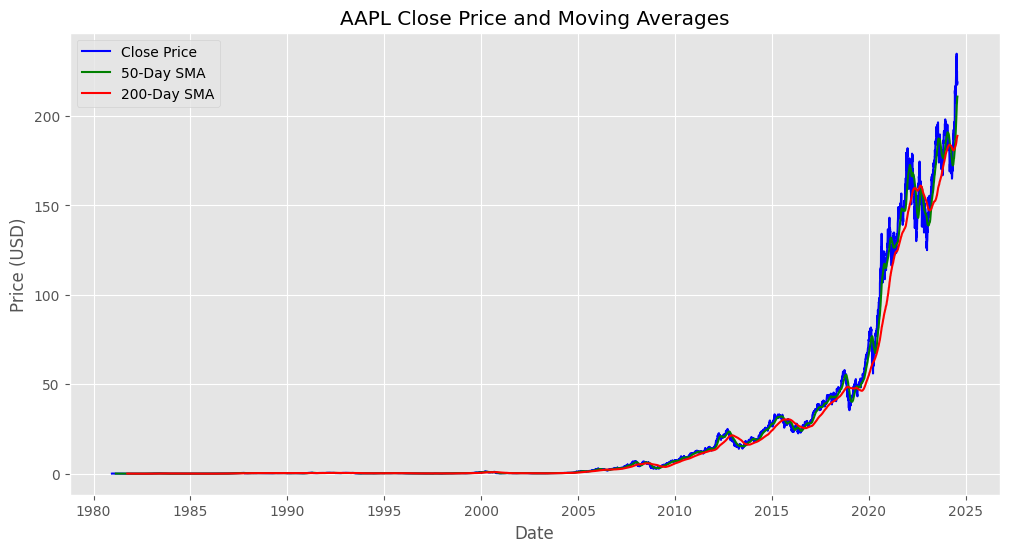

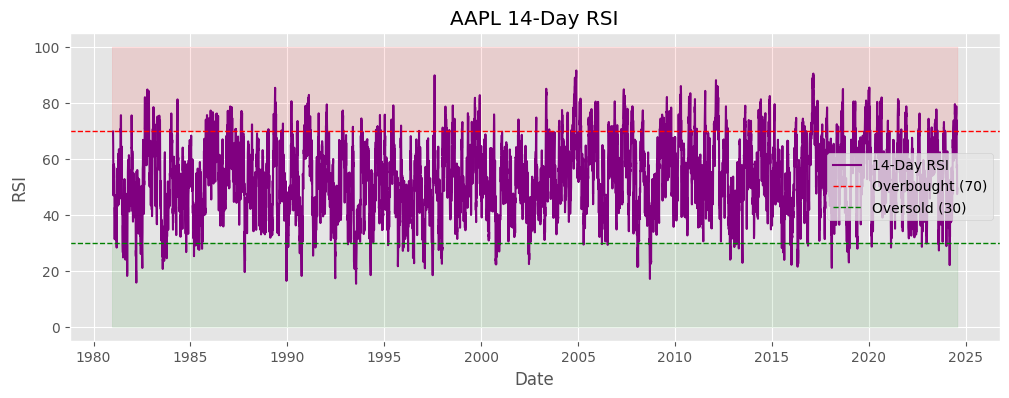

c:\Users\Yonas\Desktop\kifiya\week1\Kifiya-Ai-week1\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


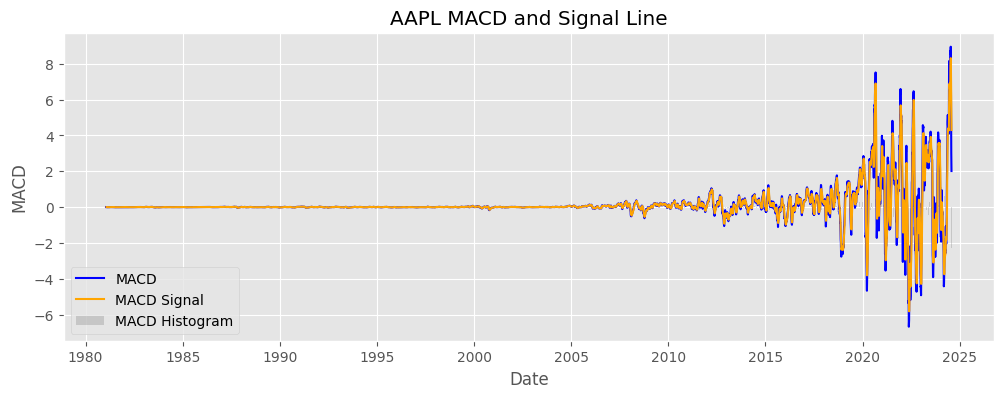

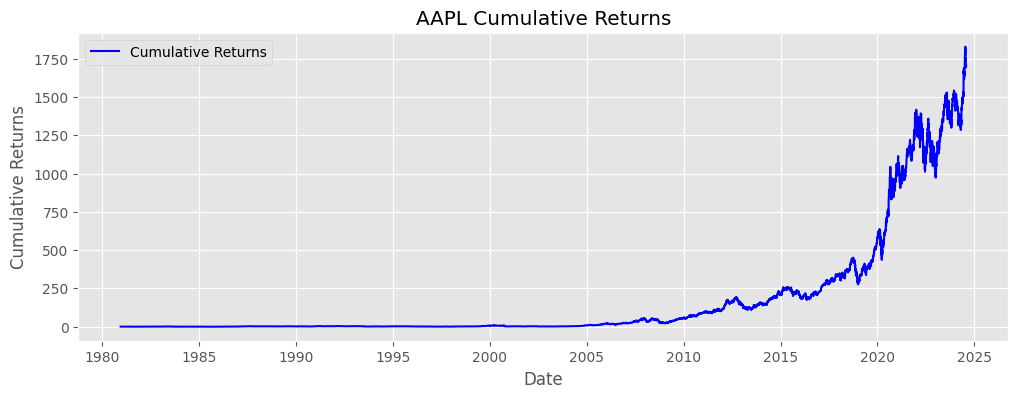

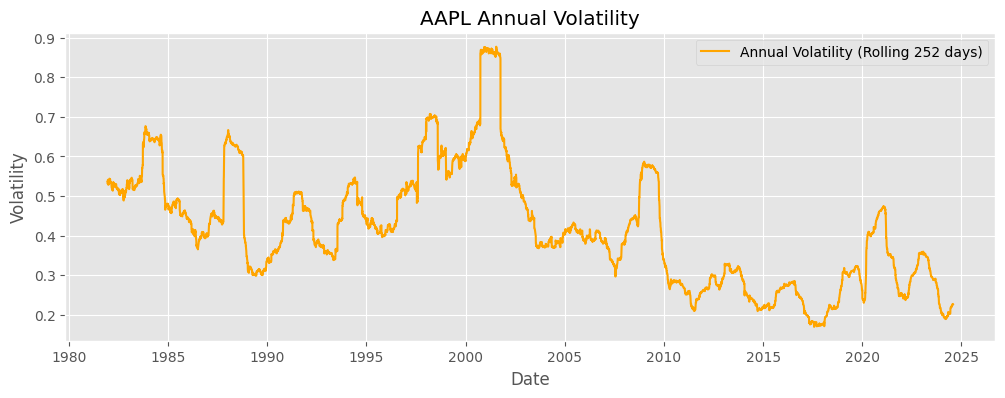

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ta  # Technical Analysis Library

# Load your stock price data
file_path = '../data/AAPL_historical_data.csv'
data = pd.read_csv(file_path)

# Ensure necessary columns are present: Open, High, Low, Close, Volume
print(data.head())

# 1. Prepare and Clean the Data
# Convert 'Date' column to datetime and sort by date if not already
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').reset_index(drop=True)

# Set 'Date' as the DataFrame index for easier plotting and analysis
data.set_index('Date', inplace=True)

# 2. Apply Technical Indicators with `ta`

# Moving Averages
data['SMA_50'] = ta.trend.sma_indicator(close=data['Close'], window=50)
data['SMA_200'] = ta.trend.sma_indicator(close=data['Close'], window=200)

# Relative Strength Index (RSI)
data['RSI_14'] = ta.momentum.rsi(close=data['Close'], window=14)

# MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(close=data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

# 3. Calculate Financial Metrics using `pandas`

# Cumulative Returns
data['Cumulative_Returns'] = (1 + data['Close'].pct_change()).cumprod() - 1

# Annual Volatility (Standard deviation of daily returns, multiplied by sqrt of 252)
data['Returns'] = data['Close'].pct_change()
data['Annual_Volatility'] = data['Returns'].rolling(window=252).std() * (252 ** 0.5)

# 4. Visualize the Data

# Set up plotting style
plt.style.use('ggplot')

# Plot the Close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='green')
plt.plot(data['SMA_200'], label='200-Day SMA', color='red')
plt.title('AAPL Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plot RSI with highlighted overbought and oversold regions
plt.figure(figsize=(12, 4))
plt.plot(data['RSI_14'], label='14-Day RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', lw=1, label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', lw=1, label='Oversold (30)')
plt.fill_between(data.index, y1=70, y2=100, color='red', alpha=0.1)
plt.fill_between(data.index, y1=0, y2=30, color='green', alpha=0.1)
plt.title('AAPL 14-Day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD with Signal Line and Histogram
plt.figure(figsize=(12, 4))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD'] - data['MACD_Signal'], color='gray', alpha=0.3, label='MACD Histogram')
plt.title('AAPL MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

# Plot Cumulative Returns
plt.figure(figsize=(12, 4))
plt.plot(data['Cumulative_Returns'], label='Cumulative Returns', color='blue')
plt.title('AAPL Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Plot Annual Volatility
plt.figure(figsize=(12, 4))
plt.plot(data['Annual_Volatility'], label='Annual Volatility (Rolling 252 days)', color='orange')
plt.title('AAPL Annual Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [23]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Additional statistics
print("\nCumulative Returns:")
print(data['Cumulative_Returns'].tail())

print("\nAnnual Volatility:")
print(data['Annual_Volatility'].tail())

Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_50       SMA_200  \
count  1.099800e+04  10998.000000  10998.000000  10949.000000  10799.000000   
mean   3.180806e+08      0.000752      0.001546     21.923676     20.937691   
std    3.354523e+08      0.0117